# Overwatch2 win-lose recorder

### 1. 탱, 딜, 힐 어느것으로 하는지...

1. 자기 아이디를 입력한다.
2. 게임이 시작하면 캐릭터 선택시 아이디 위치를 확인
3. 그 아이디에 해당하는 포지션마크 이미지 인식
4. 포지션 판별

In [6]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install mss

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


승리=[견후추|이1


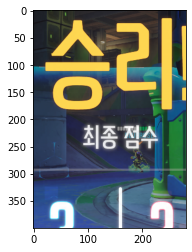

In [18]:
import matplotlib.pyplot as plt
from mss import mss
import numpy as np
import cv2
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

sct = mss()

# image = cv2.imread("input_path")
# image = plt.imread(r'C:\\Users\\hsjin\\PythonStudy\\오버워치_승패_카운팅\\승리흐림.png')
WL_box = {'top': 330, 'left': 800, 'width': 280, 'height': 400} #승패 규격
# WL_box = {'top': 330, 'left': 750, 'width': 410, 'height': 400} #무승부
sct_img = sct.grab(WL_box)
img_np = np.array(sct_img)
hsv0 = cv2.cvtColor(img_np, cv2.COLOR_BGR2HSV)
img_np = cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB)
plt.imshow(img_np)

ori_text = pytesseract.image_to_string(img_np, lang='kor', config='--oem 3 --psm 6')
ori_text = ori_text.replace("\n", " ")
ori_text = ori_text.replace(" ","")
print(ori_text)

0근!"택스이휴


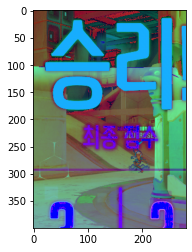

In [19]:
plt.imshow(hsv0)
ori_text = pytesseract.image_to_string(hsv0, lang='kor', config='--oem 3 --psm 6')
ori_text = ori_text.replace("\n", " ")
ori_text = ori_text.replace(" ","")
print(ori_text)

In [ ]:
yellow_lo = np.array([20, 155, 150])
yellow_hi = np.array([40, 250, 255])
mask0 = cv2.inRange(hsv0, yellow_lo, yellow_hi)
mask0 = 255-mask0
mask0 = cv2.cvtColor(mask0, cv2.COLOR_BGR2RGB)
plt.imshow(mask0)


ori_text = pytesseract.image_to_string(mask0, lang='kor', config='--oem 3 --psm 10')
ori_text = ori_text.replace("\n", " ")
ori_text = ori_text.replace(" ","")
print(ori_text)

### tesseract 테스트

i=0,j=3 / text : ^섭섭레  x
i=0,j=4 / text : ^섭섭레  x
i=0,j=5 / text : 레^_0  x
i=0,j=6 / text : 스레  x
i=0,j=7 / text : 솜레  x
i=0,j=8 / text : 솜레  x
i=0,j=9 / text : 솜레  x
i=0,j=10 / text : 쉐  x
i=0,j=11 / text : ^0레  x
i=0,j=12 / text : ^0레  x
i=0,j=13 / text : 승레  x
i=1,j=3 / text : ^리  x
i=1,j=4 / text : ^리  x
i=1,j=5 / text : 이<|0  x
i=1,j=6 / text : 승리  o
i=1,j=7 / text : 승리  o
i=1,j=8 / text : 69  x
i=1,j=9 / text : 승리  o
i=1,j=10 / text : 승리  o
i=1,j=11 / text : ㅅ>)리  x
i=1,j=12 / text : ㅅ>)리  x
i=1,j=13 / text : 69  x
i=2,j=3 / text : ㅅ。리  x
i=2,j=4 / text : ㅅ。리  x
i=2,j=5 / text : 이<|0  x
i=2,j=6 / text : 승리  o
i=2,j=7 / text : 승리  o
i=2,j=8 / text : 69  x
i=2,j=9 / text : 승리  o
i=2,j=10 / text : 승리  o
i=2,j=11 / text : ㅅ)리  x
i=2,j=12 / text : ㅅ)리  x
i=2,j=13 / text : 69  x
i=3,j=3 / text : ㅅ。리  x
i=3,j=4 / text : ㅅ。리  x
i=3,j=5 / text : 이<|0  x
i=3,j=6 / text : 승리  o
i=3,j=7 / text : 승리  o
i=3,j=8 / text : 69  x
i=3,j=9 / text : 승리  o
i=3,j

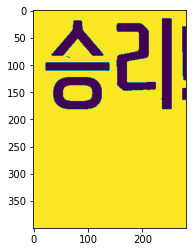

In [21]:
yellow_lo = np.array([20, 155, 150])
yellow_hi = np.array([40, 250, 255])
mask0 = cv2.inRange(hsv0, yellow_lo, yellow_hi)
mask0 = 255-mask0
# mask0 = cv2.cvtColor(mask0, cv2.COLOR_BGR2RGB)

for i in range(0,4):
    for j in range(3,14):
        check = '  x'
        ori_text = pytesseract.image_to_string(mask0, lang='kor', config=f'--oem {i} --psm {j}')
        ori_text = ori_text.replace("\n", " ")
        ori_text = ori_text.replace(" ","")
        if("승리" in ori_text):
            check = '  o'
        print(f"i={i},j={j} / text : " + ori_text + check)

plt.imshow(mask0)

패배


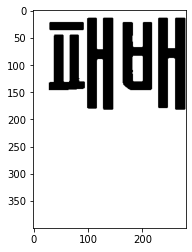

In [14]:
red_lo = np.array([150, 250, 230])
red_hi = np.array([180, 255, 255])
mask0 = cv2.inRange(hsv0, red_lo, red_hi)
mask0 = 255-mask0
mask0 = cv2.cvtColor(mask0, cv2.COLOR_BGR2RGB)
plt.imshow(mask0)


ori_text = pytesseract.image_to_string(mask0, lang='kor', config='--oem 0 --psm 8')
ori_text = ori_text.replace("\n", " ")
ori_text = ori_text.replace(" ","")
print(ori_text)

i=0,j=3 / text :   x
i=0,j=4 / text : 티스닌†0†  x
i=0,j=5 / text : 닌†스0티_l  x
i=0,j=6 / text : 티스닌†0†  x
i=0,j=7 / text : 무승부  o
i=0,j=8 / text : 무승부  o
i=0,j=9 / text : 무승부  o
i=0,j=10 / text : 밝  x
i=0,j=11 / text : 티스닌_「0_1_  x
i=0,j=12 / text : 무숑부  x
i=0,j=13 / text : †【그_^0†닌  x
i=1,j=3 / text :   x
i=1,j=4 / text : ㅁ스너ㅜㅠㅠ  x
i=1,j=5 / text : 과<|0마  x
i=1,j=6 / text : ㅁ스너ㅜㅠㅠ  x
i=1,j=7 / text : 무승부  o
i=1,j=8 / text : 27  x
i=1,j=9 / text : 무승부  o
i=1,j=10 / text : 무승부  o
i=1,j=11 / text : ㅁ스터」』ㅇ1  x
i=1,j=12 / text : 무슴무  x
i=1,j=13 / text : 27  x
i=2,j=3 / text :   x
i=2,j=4 / text : ㅁ스너ㅜㅠㅠ  x
i=2,j=5 / text : 과<|0마  x
i=2,j=6 / text : ㅁ스너ㅜㅠㅠ  x
i=2,j=7 / text : 무승부  o
i=2,j=8 / text : 27  x
i=2,j=9 / text : 무승부  o
i=2,j=10 / text : 무승부  o
i=2,j=11 / text : 미스터』ㅇ  x
i=2,j=12 / text : 무슴무  x
i=2,j=13 / text : _「【그_^줍)†닌  x
i=3,j=3 / text :   x
i=3,j=4 / text : ㅁ스너ㅜㅠㅠ  x
i=3,j=5 / text : 과<|0마  x
i=3,j=6 / text : ㅁ스너ㅜㅠㅠ  x
i=3,j=7 / text : 무승부 

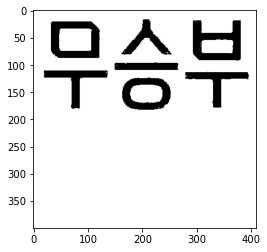

In [74]:
red_lo = np.array([150, 250, 230])
red_hi = np.array([180, 255, 255])
mask0 = cv2.inRange(hsv0, red_lo, red_hi)
mask0 = 255-mask0
mask0 = cv2.cvtColor(mask0, cv2.COLOR_BGR2RGB)

for i in range(0,4):
    for j in range(3,14):
        check = '  x'
        ori_text = pytesseract.image_to_string(mask0, lang='kor', config=f'--oem {i} --psm {j}')
        ori_text = ori_text.replace("\n", " ")
        ori_text = ori_text.replace(" ","")
        if("무승부" in ori_text):
            check = '  o'
        print(f"i={i},j={j} / text : " + ori_text + check)

plt.imshow(mask0)

### 2. 특정 영역 글자 인식(승리/패배)

1. 게임이 끝날때만 글자인식이 가동되게 하면 좋음.
2. 끝날때 중앙영역 글자 인식
3. 승패 판별!

### 3. 기록

1. 기록한 승패를 화면에 투명하게 글자만 보이게 띄울 수 있는 방법을 찾아보자.

# 최종 결과물(아래 코드만 실행 하면된다)

In [ ]:
import win32api, win32con, win32gui, win32ui, timer, time as Time
import cv2
import numpy as np
from mss import mss
import pytesseract

windowText = '승패 인식중...'
hWindow = 0

pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

# WL_box = {'top': 330, 'left': 800, 'width': 280, 'height': 400}
# Center : 961.5 , 539

sct = mss()

T_Record = [0,0]
D_Record = [0,0]
H_Record = [0,0]

def main():
    
    hInstance = win32api.GetModuleHandle()
    className = 'MyWindowClassName'

    # http://msdn.microsoft.com/en-us/library/windows/desktop/ms633576(v=vs.85).aspx
    # win32gui does not support WNDCLASSEX.
    wndClass                = win32gui.WNDCLASS()
    # http://msdn.microsoft.com/en-us/library/windows/desktop/ff729176(v=vs.85).aspx
    wndClass.style          = win32con.CS_HREDRAW | win32con.CS_VREDRAW
    wndClass.lpfnWndProc    = wndProc
    wndClass.hInstance      = hInstance
    wndClass.hCursor        = win32gui.LoadCursor(None, win32con.IDC_ARROW)
    wndClass.hbrBackground  = win32gui.GetStockObject(win32con.WHITE_BRUSH)
    wndClass.lpszClassName  = className
    # win32gui does not support RegisterClassEx
    wndClassAtom = win32gui.RegisterClass(wndClass)

    # http://msdn.microsoft.com/en-us/library/windows/desktop/ff700543(v=vs.85).aspx
    # Consider using: WS_EX_COMPOSITED, WS_EX_LAYERED, WS_EX_NOACTIVATE, WS_EX_TOOLWINDOW, WS_EX_TOPMOST, WS_EX_TRANSPARENT
    # The WS_EX_TRANSPARENT flag makes events (like mouse clicks) fall through the window.
    exStyle = win32con.WS_EX_COMPOSITED | win32con.WS_EX_LAYERED | win32con.WS_EX_NOACTIVATE | win32con.WS_EX_TOPMOST | win32con.WS_EX_TRANSPARENT

    # http://msdn.microsoft.com/en-us/library/windows/desktop/ms632600(v=vs.85).aspx
    # Consider using: WS_DISABLED, WS_POPUP, WS_VISIBLE
    style = win32con.WS_DISABLED | win32con.WS_POPUP | win32con.WS_VISIBLE

    # http://msdn.microsoft.com/en-us/library/windows/desktop/ms632680(v=vs.85).aspx
    hWindow = win32gui.CreateWindowEx(
        exStyle,
        wndClassAtom,
        None, # WindowName
        style,
        1150, # x
        200, # y
        win32api.GetSystemMetrics(win32con.SM_CXSCREEN), # width
        win32api.GetSystemMetrics(win32con.SM_CYSCREEN), # height
        None, # hWndParent
        None, # hMenu
        hInstance,
        None # lpParam
    )

    # http://msdn.microsoft.com/en-us/library/windows/desktop/ms633540(v=vs.85).aspx
    win32gui.SetLayeredWindowAttributes(hWindow, 0x00FFFFFF, 255, win32con.LWA_COLORKEY | win32con.LWA_ALPHA)

    # http://msdn.microsoft.com/en-us/library/windows/desktop/dd145167(v=vs.85).aspx
    #win32gui.UpdateWindow(hWindow)

    # http://msdn.microsoft.com/en-us/library/windows/desktop/ms633545(v=vs.85).aspx
    win32gui.SetWindowPos(hWindow, win32con.HWND_TOPMOST, 0, 0, 0, 0,
        win32con.SWP_NOACTIVATE | win32con.SWP_NOMOVE | win32con.SWP_NOSIZE | win32con.SWP_SHOWWINDOW)

    # http://msdn.microsoft.com/en-us/library/windows/desktop/ms633548(v=vs.85).aspx
#     win32gui.ShowWindow(hWindow, win32con.SW_SHOW)
    
    win32gui.UpdateWindow(hWindow)
    timer.set_timer(1000, customDraw)
    
    win32gui.PumpMessages()
    
draw = 0
def customDraw(timer_id, time):
    global hWindow
    global draw
    global windowText
    
    while True:
        WL_box = {'top': 330, 'left': 800, 'width': 280, 'height': 400}
        sct_img = sct.grab(WL_box)
        img_np = np.array(sct_img) 
#         cv2.imshow('WL_box', img_np)

        hsv0 = cv2.cvtColor(img_np, cv2.COLOR_BGR2HSV)
#         cv2.imshow('aaa',hsv0)
        yellow_lo = np.array([20, 155, 150])
        yellow_hi = np.array([40, 250, 255])
        mask1 = cv2.inRange(hsv0, yellow_lo, yellow_hi)
        mask1 = 255-mask1
        mask1 = cv2.cvtColor(mask1, cv2.COLOR_BGR2RGB) # 흰색바탕 검정글자로 변경
#         cv2.imshow('bbb',mask1)
        ori_text = pytesseract.image_to_string(mask1, lang='kor', config='--oem 1 --psm 6')
        ori_text = ori_text.replace("\n", " ")
        ori_text = ori_text.replace(" ","")
        if ("승리" in ori_text): # 승리는 인식 잘한다.
            text = ori_text
            D_Record[0] += 1
            print(text + " -> " + str(D_Record))
            windowText = "딜러 ｜ " + str(D_Record[0]) + "승 : " + str(D_Record[1]) + "패 | 무승부 : " + str(draw)+"회"
            Time.sleep(5)
            cv2.destroyAllWindows()  # cv2 창 종료
            break
        elif ("패배" in ori_text): # 패배가 잘 안보이는 상태
            text = ori_text
            D_Record[1] += 1
            print(text + " -> " + str(D_Record))
            windowText = "딜러 ｜ " + str(D_Record[0]) + "승 : " + str(D_Record[1]) + "패 | 무승부 : " + str(draw)+"회"
            Time.sleep(5)
            cv2.destroyAllWindows()  # cv2 창 종료
            break
        elif("승리" not in ori_text and "패배" not in ori_text): # 승리를 인식 못하면 대체로 패배...
            # 패배를 잘 보이게 해준다.
            red_lo = np.array([150, 250, 230])
            red_hi = np.array([180, 255, 255])
            mask0 = cv2.inRange(hsv0, red_lo, red_hi)
            mask0 = 255-mask0
            mask0 = cv2.cvtColor(mask0, cv2.COLOR_BGR2RGB)
            
            text = pytesseract.image_to_string(mask0, lang='kor', config='--oem 0 --psm 6')
            text = text.replace("\n", " ")
            text = text.replace(" ","")
            if("패배" in text):
                D_Record[1] += 1
                print(text + " -> " + str(D_Record))
                windowText = "딜러 ｜ " + str(D_Record[0]) + "승 : " + str(D_Record[1]) + "패 | 무승부 : " + str(draw)+"회"
                Time.sleep(5)
                cv2.destroyAllWindows()  # cv2 창 종료
                break
                
            WL_box = {'top': 330, 'left': 750, 'width': 410, 'height': 400} #무승부
            sct_img = sct.grab(WL_box)
            img_np = np.array(sct_img)
            hsv0 = cv2.cvtColor(img_np, cv2.COLOR_BGR2HSV)
            
            red_lo = np.array([150, 250, 230])
            red_hi = np.array([180, 255, 255])
            mask0 = cv2.inRange(hsv0, red_lo, red_hi)
            mask0 = 255-mask0
            mask0 = cv2.cvtColor(mask0, cv2.COLOR_BGR2RGB)
            
            text = pytesseract.image_to_string(mask0, lang='kor', config='--oem 0 --psm 8')
            text = text.replace("\n", " ")
            text = text.replace(" ","")
            
            if("무승부" in text) :
                print("무승부")
                draw += 1
                windowText = "딜러 ｜ " + str(D_Record[0]) + "승 : " + str(D_Record[1]) + "패 | 무승부 : " + str(draw)+"회"
                Time.sleep(5)
                cv2.destroyAllWindows()  # cv2 창 종료
                break
                
#         print(str(draw) + text)
#         print(ori_text)
        
    win32gui.InvalidateRect(hWindow, None, True)

def wndProc(hWnd, message, wParam, lParam):
    if message == win32con.WM_PAINT:
        hdc, paintStruct = win32gui.BeginPaint(hWnd)

        dpiScale = win32ui.GetDeviceCaps(hdc, win32con.LOGPIXELSX) / 60.0
        fontSize = 20

        # http://msdn.microsoft.com/en-us/library/windows/desktop/dd145037(v=vs.85).aspx
        lf = win32gui.LOGFONT()
        lf.lfFaceName = "Arial"
        lf.lfHeight = int(round(dpiScale * fontSize))
#         lf.lfWeight = 150
        # Use nonantialiased to remove the white edges around the text.
        lf.lfQuality = win32con.NONANTIALIASED_QUALITY # 글자 깨지는 것? 막아줌
        hf = win32gui.CreateFontIndirect(lf)
        win32gui.SelectObject(hdc, hf)

        rect = win32gui.GetClientRect(hWnd)
        # http://msdn.microsoft.com/en-us/library/windows/desktop/dd162498(v=vs.85).aspx
        win32gui.SetTextColor(hdc,win32api.RGB(0,255,255))
        win32gui.DrawText(
            hdc,
            windowText,
            -1,
            rect,
            win32con.DT_CENTER | win32con.DT_NOCLIP 
        )
        win32gui.EndPaint(hWnd, paintStruct)
        return 0

    elif message == win32con.WM_DESTROY :
        print('Closing the window.')
        win32gui.PostQuitMessage(0)
        return 0

    else:
        return win32gui.DefWindowProc(hWnd, message, wParam, lParam)


if __name__ == '__main__':
    main()

패배 -> [0, 1]
패배 -> [0, 2]
승리 -> [1, 2]
승리 -> [2, 2]
승리 -> [3, 2]
승리 -> [4, 2]
패배 -> [4, 3]
패배 -> [4, 4]
패배 -> [4, 5]
ㅅ^승리 -> [5, 5]
패배 -> [5, 6]
패배 -> [5, 7]
승리 -> [6, 7]
